In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from project2 import *
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import random, time

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

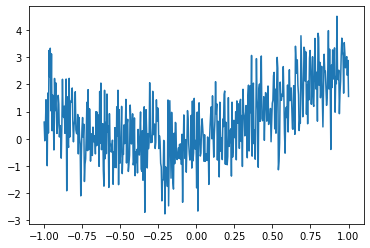

In [2]:
from project2.test import test_func_poly_deg_p
np.random.seed(3155)
avec = np.array([0,1,2])
deg = len(avec)-1
x = np.linspace(-1,1,500)
# using simple linear regression to validate the gradient descent methods
X = np.ones((x.shape[0],deg+1))
for i in range(1,X.shape[1]):
    X[:,i] = x**i
y = test_func_poly_deg_p(deg = deg, avec = avec, x = x)
ynoisy = y + np.random.normal(size=y.shape)
plt.plot(x, ynoisy)

# Using tensorflow

## Setting up training and test data

In [3]:
import tensorflow as tf
print(tf.__version__)
from sklearn.model_selection import train_test_split

2022-11-03 17:43:04.559008: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-03 17:43:04.819560: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-03 17:43:04.819594: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-03 17:43:04.877550: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-03 17:43:05.803127: W tensorflow/stream_executor/platform/de

2.10.0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Set up model

### Setting up normalizer

In [5]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))

2022-11-03 17:43:07.135753: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-03 17:43:07.135790: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-11-03 17:43:07.135816: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (johan-tuxedopulse15gen2): /proc/driver/nvidia/version does not exist
2022-11-03 17:43:07.136099: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Optimizers and linear regression

In [6]:
linear_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1)
])

linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-1),
    loss='mean_absolute_error')
linear_model.fit(X_train, y_train, epochs = 10)
ypred_train_adam = linear_model.predict(X_train)
ypred_test_adam = linear_model.predict(X_test)

Epoch 1/10
11/11 [==============================] - 0s 3ms/step - loss: 0.7134
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1393
Epoch 3/10
11/11 [==============================] - 0s 2ms/step - loss: 0.0591
Epoch 4/10
11/11 [==============================] - 0s 2ms/step - loss: 0.0412
Epoch 5/10
11/11 [==============================] - 0s 2ms/step - loss: 0.0281
Epoch 6/10
11/11 [==============================] - 0s 2ms/step - loss: 0.0232
Epoch 7/10
11/11 [==============================] - 0s 2ms/step - loss: 0.0140
Epoch 8/10
11/11 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 9/10
11/11 [==============================] - 0s 2ms/step - loss: 0.0199
Epoch 10/10
6/6 [==============================] - 0s 2ms/step


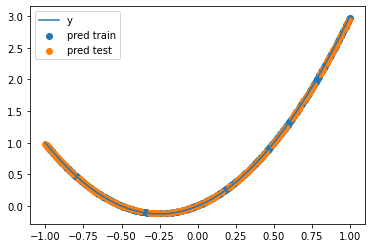

In [7]:
plt.plot(x, y, label='y')
plt.scatter(X_train[:,1].ravel(), ypred_train_adam.ravel(), label='pred train')
plt.scatter(X_test[:,1].ravel(), ypred_test_adam.ravel(), label='pred test')
plt.legend()

### Deep NN linear regression

In [8]:
def build_and_compile_model(norm, lr = 1e-3):
    model = tf.keras.Sequential([
      norm,
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(learning_rate = lr))
    return model

## compile the model

In [15]:
dnn_regression_model = build_and_compile_model(normalizer, lr=1e-1)
#dnn_regression_model.summary()

## fit the training data

In [16]:
dnn_regression_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
11/11 [==============================] - 1s 3ms/step - loss: 1.0292
Epoch 2/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2100
Epoch 3/10
11/11 [==============================] - 0s 3ms/step - loss: 0.2035
Epoch 4/10
11/11 [==============================] - 0s 3ms/step - loss: 0.0806
Epoch 5/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1542
Epoch 6/10
11/11 [==============================] - 0s 3ms/step - loss: 0.1591
Epoch 7/10
11/11 [==============================] - 0s 2ms/step - loss: 0.1044
Epoch 8/10
11/11 [==============================] - 0s 3ms/step - loss: 0.0558
Epoch 9/10
11/11 [==============================] - 0s 3ms/step - loss: 0.0677
Epoch 10/10
11/11 [==============================] - 0s 3ms/step - loss: 0.0838


## evaluate the model

In [17]:
ypred_dnn = dnn_regression_model.predict(X_test)

6/6 [==============================] - 0s 2ms/step


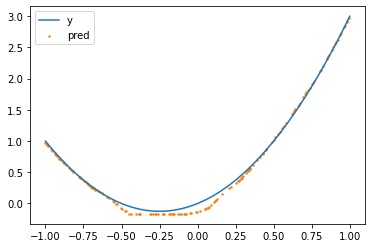

In [18]:
plt.plot(x,y, label="y")
plt.scatter(X_test[:,1], ypred_dnn, label="pred", s=2, color='C1')
plt.legend()

# Own implementation

In [13]:
n_hl = 100 # number of neurons in the first hidden layer
w0 = np.random.normal(0,.5, size=(X.shape[1], n_hl))
w0.T @ X.T

array([[-0.033, -0.032, -0.031, ..., -1.556, -1.563, -1.571],
       [ 0.29 ,  0.295,  0.299, ...,  0.776,  0.774,  0.772],
       [ 0.948,  0.942,  0.936, ..., -0.868, -0.869, -0.87 ],
       ...,
       [ 0.437,  0.438,  0.438, ...,  0.618,  0.618,  0.619],
       [-1.392, -1.385, -1.377, ...,  0.069,  0.067,  0.066],
       [ 0.3  ,  0.299,  0.297, ...,  0.252,  0.253,  0.254]])

In [22]:
from project2.neural_network import Neural_Network
nn = Neural_Network(X, y, layers = 1, nodes = 10)
nn.a[0].shape

(500, 10)